In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import pickle
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV,cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score,recall_score, roc_auc_score,f1_score
import seaborn as sns
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import cross_val_score
import eli5,shap
from eli5.sklearn import PermutationImportance

2023-01-24 16:56:09.348865: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-24 16:56:09.869045: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: :/home/parmpal/anaconda3/lib/
2023-01-24 16:56:09.869104: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-24 16:56:11.126737: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open sha

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
# #2.1 Get the file

# #STEP-1: Import Libraries
# # Code to read csv file into colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials



# # #STEP-2: Autheticate E-Mail ID
# # auth.authenticate_user()
# # gauth = GoogleAuth()
# # gauth.credentials = GoogleCredentials.get_application_default()
# # drive = GoogleDrive(gauth)

# # #1mukNdQaon60oH2KAqjWz5l1c5LlA1Y3b
# downloaded = drive.CreateFile({'id':'1eEutmhScN2_0hJlOJfS0r172IY4eG-X-'}) # replace the id with id of file you want to access
# data = pd.read_excel (r'/content/drive/My Drive/Colab Notebooks/MA/article 7.xlsx')
# data.head()
# printxdata = pd.read_excel (r'/content/drive/My Drive/Colab Notebooks/MA/xdata.xlsx')
# ydata= pd.read_excel (r'/content/drive/My Drive/Colab Notebooks/MA/ydata range.xlsx')
# xdata.head()
# ydata.head()


# print (xdata)
# print (ydata) (data)

# # downloaded.GetContentFile('Data-v4.csv')
# # #STEP-4: Read File

# # #3.1 Read file as panda dataframe
# #/content/drive/My Drive/Colab Notebooks/Old/eau.xlsx
# from google.colab import drive
# #drive.mount('/content/drive')
# #data = pd.read_excel (r'/content/drive/My Drive/Colab Notebooks/AllData-v8.xlsx')

# #data = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Data-v4.csv')



In [4]:
data = pd.read_excel (r'article 7.xlsx')
data.head()
print (data)

       UPV (m/s)  UCS (MPa)  Density  Efficient Porosity
0    4221.311475    18.1277     2.07               11.74
1    2814.207650    16.8723     2.10               17.85
2    5396.825397    45.6404     2.60                1.93
3    2263.736264    17.0220     2.13               19.20
4    4227.642276    20.0287     2.06               12.69
..           ...        ...      ...                 ...
473  5832.000000   149.0000     2.72               10.80
474  5732.000000   132.0000     2.76                2.10
475  5412.000000   160.0000     2.72                0.20
476  6053.000000   122.0000     2.18                2.60
477  2831.000000   147.0000     2.69               22.80

[478 rows x 4 columns]


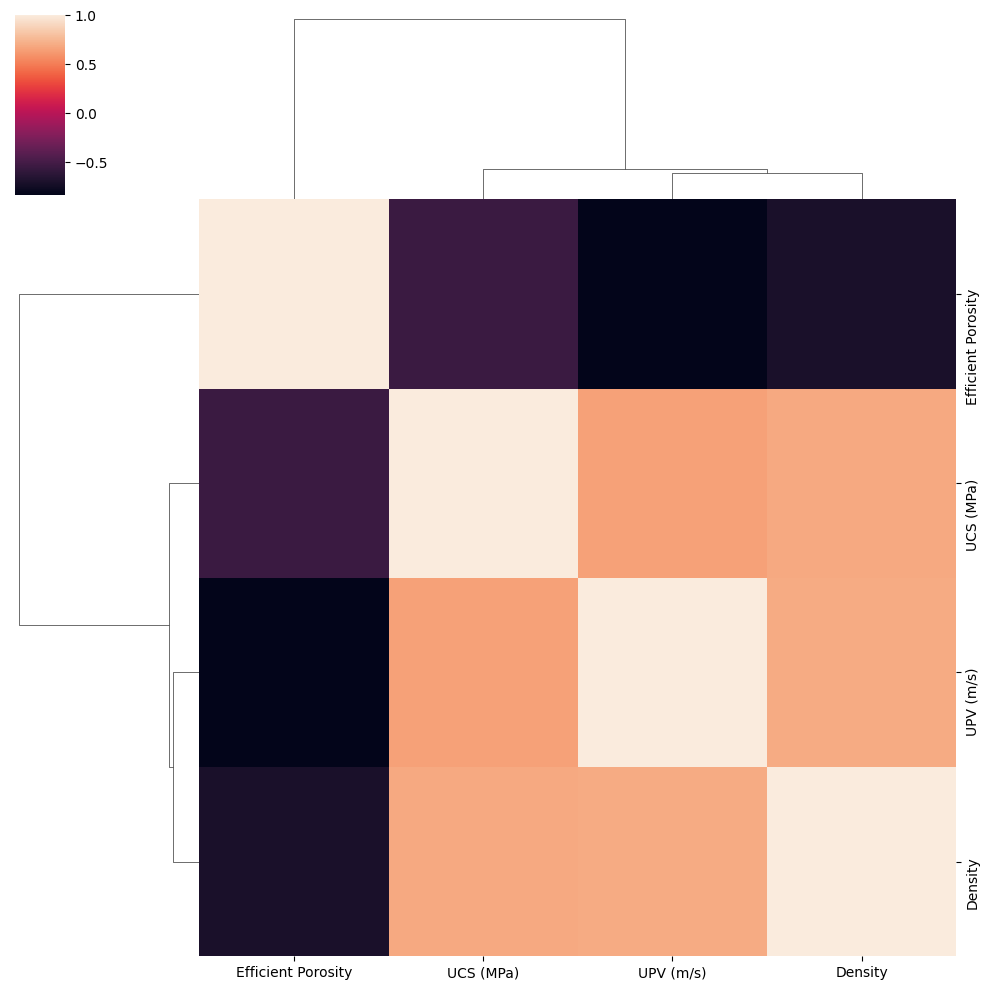

In [5]:
sns.clustermap(data.corr())

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
#dendrogram = sch.dendrogram(sch.linkage(data, method='single'))
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Sample index')
#plt.ylabel('Distance')
#plt.savefig("/content/drive/My Drive/Colab Notebooks/foo2.pdf")

In [7]:
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Sample index')
#plt.ylabel('Distance')
#dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))

In [8]:
from scipy.cluster import hierarchy
#dendrogram = sch.dendrogram(sch.linkage(data, method='average'))
#plt.title('Hierarchical Clustering Dendrogram')
#plt.xlabel('Sample index')
#plt.ylabel('Distance')

Text(0, 0.5, 'Sample index')

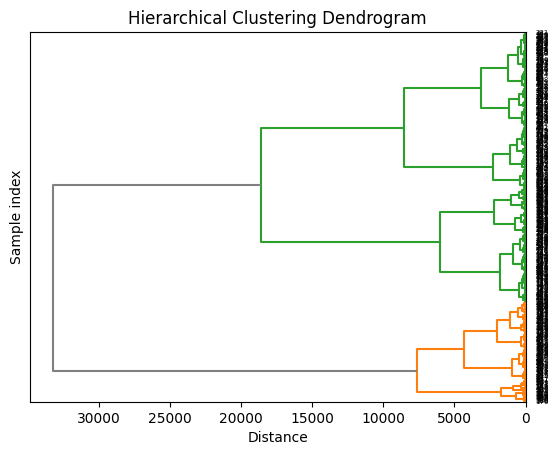

In [9]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(data, 'ward')
# Make the dendro
dendrogram(Z, labels=data.index, leaf_rotation=0, orientation="left", above_threshold_color='grey')
 
# Create a color palette with 3 color for the 3 cyl possibilities
my_palette = plt.cm.get_cmap("Accent", 3)
 # transforme the 'cyl' column in a categorical variable. It will allow to put one color on each level.
 #data4['cyl']=pd.Categorical(data4['cyl'])
 #my_color=data4['cyl'].cat.codes
 

 
# Apply the right color to each label
ax = plt.gca()
xlbls = ax.get_ymajorticklabels()

num=-1
for lbl in xlbls:
    num+=1
  #   val=my_color[num]
 #lbl.set_color(my_palette(val))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Distance')
plt.ylabel('Sample index') 
    

In [10]:
# # #2.1 Get the file

# #STEP-1: Import Libraries
# # Code to read csv file into colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials



# #STEP-2: Autheticate E-Mail ID
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

# # #1mukNdQaon60oH2KAqjWz5l1c5LlA1Y3b
# downloaded = drive.CreateFile({'id':'1eEutmhScN2_0hJlOJfS0r172IY4eG-X-'}) # replace the id with id of file you want to access
# xdata = pd.read_excel (r'/content/drive/My Drive/Colab Notebooks/MA/xdata.xlsx')
# ydata= pd.read_excel (r'/content/drive/My Drive/Colab Notebooks/MA/ydata range.xlsx')
# xdata.head()
# ydata.head()


# print (xdata)
# print (ydata)
# # downloaded.GetContentFile('Data-v4.csv')
# # #STEP-4: Read File

# # #3.1 Read file as panda dataframe
# #/content/drive/My Drive/Colab Notebooks/Old/eau.xlsx
# from google.colab import drive
# #drive.mount('/content/drive')
# #data = pd.read_excel (r'/content/drive/My Drive/Colab Notebooks/AllData-v8.xlsx')

# #data = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Data-v4.csv')


In [11]:
xdata = pd.read_excel (r'xdata.xlsx')
ydata= pd.read_excel (r'ydata range.xlsx')
xdata.head()
ydata.head()


print (xdata)
print (ydata)

       UPV (m/s) Density  Efficient Porosity
0    4221.311475    2.07               11.74
1    2814.207650     2.1               17.85
2    5396.825397     2.6                1.93
3    2263.736264    2.13               19.20
4    4227.642276    2.06               12.69
..           ...     ...                 ...
473  5832.000000    2.72               10.80
474  5732.000000    2.76                2.10
475  5412.000000    2.72                0.20
476  6053.000000    2.18                2.60
477  2831.000000    2.69               22.80

[478 rows x 3 columns]
    UCS (MPa)
0     18.1277
1     16.8723
2     45.6404
3      17.022
4     20.0287
..        ...
473       149
474       132
475       160
476       122
477       147

[478 rows x 1 columns]




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot: xlabel='UPV (m/s)', ylabel='Density'>

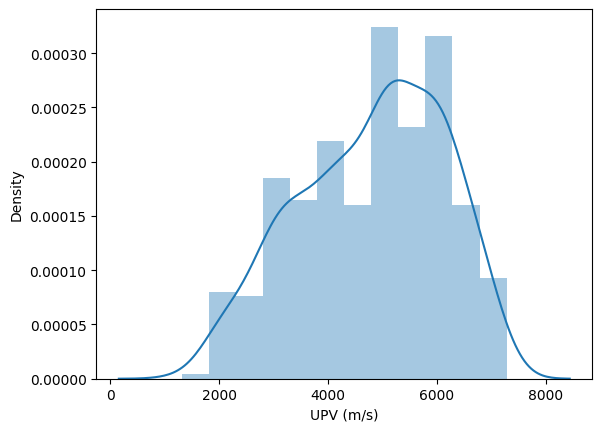

In [12]:
sns.distplot(data['UPV (m/s)'])

#les valeurs des coordonnées X



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot: xlabel='UCS (MPa)', ylabel='Density'>

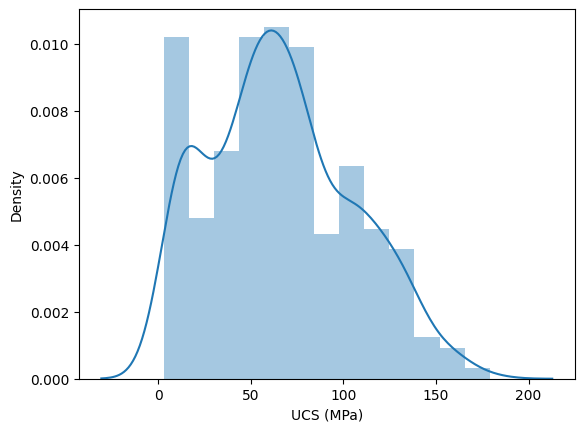

In [13]:
sns.distplot(data['UCS (MPa)'])

#les valeurs des coordonnées y



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot: xlabel='Density', ylabel='Density'>

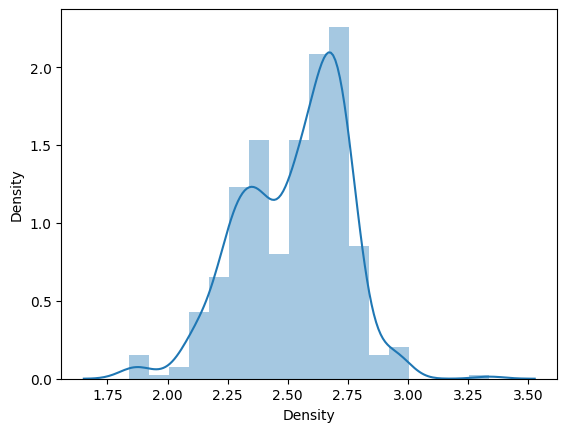

In [14]:
sns.distplot(data['Density'])



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



<AxesSubplot: xlabel='Efficient Porosity', ylabel='Density'>

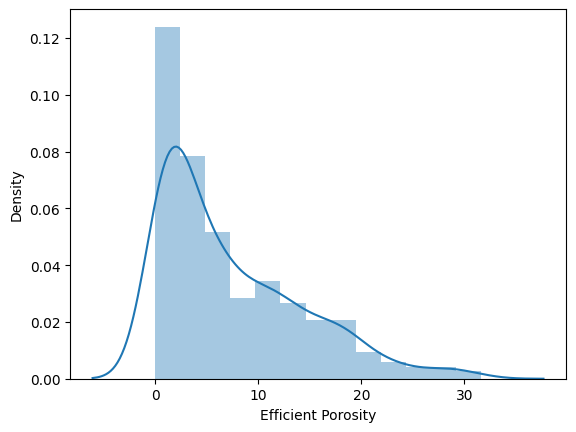

In [15]:
sns.distplot(data['Efficient Porosity'])

In [16]:
data.corr()['UCS (MPa)'].sort_values()

Efficient Porosity   -0.551020
UPV (m/s)             0.652781
Density               0.690253
UCS (MPa)             1.000000
Name: UCS (MPa), dtype: float64

In [17]:
y = data['UCS (MPa)']
y.head()

0    18.1277
1    16.8723
2    45.6404
3    17.0220
4    20.0287
Name: UCS (MPa), dtype: float64

In [18]:
x= data[['Density', 'UPV (m/s)', 'Efficient Porosity']]
x.head()

,Density,UPV (m/s),Efficient Porosity
0,2.07,4221.311475,11.74
1,2.10,2814.207650,17.85
2,2.60,5396.825397,1.93
3,2.13,2263.736264,19.20
4,2.06,4227.642276,12.69


In [19]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
#We will split the dataset into train and test dataset. We have reserved 20% of the dataset 
#for checking the accuracy of the trained model. Independent train and test dataset are further scaled to make sure that
# the input data is standard normally distributed are centred around zero and have variance in the same order.
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=1, test_size=0.2)

In [20]:
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state =5)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=1)
model1 = RandomForestRegressor().fit(x_train, y_train)
model1.predict(x_test)
model1.score(x_test, y_test)

0.6232591310082917

In [21]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
x, y = make_regression(n_features=3, random_state=1, n_samples=478, noise=20)
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.2, random_state =5)
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    random_state=1)
model2 = MLPRegressor(random_state=1, max_iter=1000).fit(x_train, y_train)
model2.predict(x_test)
model2.score(x_test, y_test)

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


0.9269390935884064

In [22]:
from sklearn import linear_model
model3=linear_model.LinearRegression()

In [23]:
x_train, x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=5)

In [24]:
model3.fit(x_train,y_train)

LinearRegression()

In [25]:
model3.score(x_test, y_test)

0.9397298259936918

In [26]:
y_pred1=model1.predict(x)
y_pred2=model2.predict(x)
y_pred3=model3.predict(x)


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [27]:
from sklearn.metrics import mean_squared_error
y1=mean_squared_error(y, y_pred1)
y2=mean_squared_error(y, y_pred2)
y3=mean_squared_error(y, y_pred3)

In [28]:
print (y1, y2, y3)

6666.666202310077 481.3273064882218 409.59305551653904


In [29]:
from sklearn.metrics import mean_absolute_error
y1=mean_absolute_error(y, y_pred1)
y2=mean_absolute_error(y, y_pred2)
y3=mean_absolute_error(y, y_pred3)

In [30]:
print (y1, y2, y3)

64.56579450771589 17.30200001484927 16.11161367039522


In [31]:
from sklearn.metrics import make_scorer
MSE=make_scorer(mean_squared_error)
from sklearn.model_selection import cross_val_score
#cross_val_score(RandomForestRegressor(), x, y, cv=4, scoring=mean_squared_error)

In [32]:
from sklearn.svm import SVR
model1=SVR(kernel='rbf', degree=3)
params={'gamma': np.arange(0.1, 1, 0.05)}
grid=GridSearchCV(model1, param_grid=params, cv=3,
                  scoring=mean_absolute_error)
grid.fit(x,y)

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/parmpal/anaconda3/envs/mixlib/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_absolute_error() takes 2 positional arguments but 3 were given

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/parmpal/anaconda3/envs/mixlib/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_absolute_error() takes 2 positional arguments but 3 were given

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/parmpal/anaconda3/envs/mixlib/lib/python3

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/parmpal/anaconda3/envs/mixlib/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_absolute_error() takes 2 positional arguments but 3 were given

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/parmpal/anaconda3/envs/mixlib/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
TypeError: mean_absolute_error() takes 2 positional arguments but 3 were given

Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/parmpal/anaconda3/envs/mixlib/lib/python3

GridSearchCV(cv=3, estimator=SVR(),
             param_grid={'gamma': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55, 0.6 ,
       0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95])},
             scoring=<function mean_absolute_error at 0x7fec778c8a60>)

In [33]:
best_model1=grid.best_estimator_

In [34]:

y_pred = best_model1.predict(x)
mean_squared_error(y, y_pred)

2848.797632998666

In [35]:
Best_Model=model2

In [36]:

def scorer(estimator, X, Y):
    y_pred = Best_Model.predict(X)
    return mean_squared_error(Y, y_pred)
scores = cross_val_score(Best_Model, x, y, cv=3,scoring=scorer)
scores

Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.


array([409.3283366 , 489.06755173, 546.03885484])

In [37]:

perm = PermutationImportance(Best_Model).fit(x, y)
eli5.show_weights(perm)

Weight,Feature
0.8824 ± 0.0637,x1
0.8412 ± 0.0342,x2
0.0279 ± 0.0094,x0


In [39]:


explainer=shap.KernelExplainer(Best_Model.predict, x)
shap_values = explainer.shap_values(x)
shap_values.shape
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, x)

Using 478 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/478 [00:00<?, ?it/s]

In [40]:
# visualize the first prediction's explanation 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], x[0,:])

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


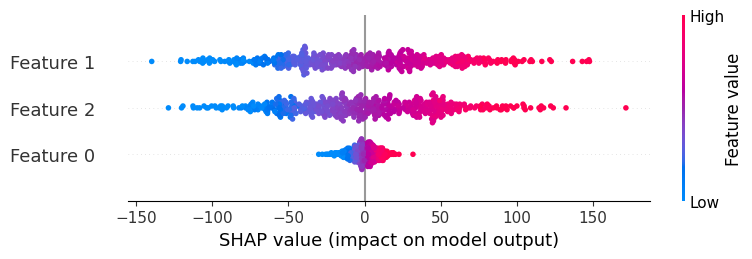

In [41]:
shap.summary_plot(shap_values, x)

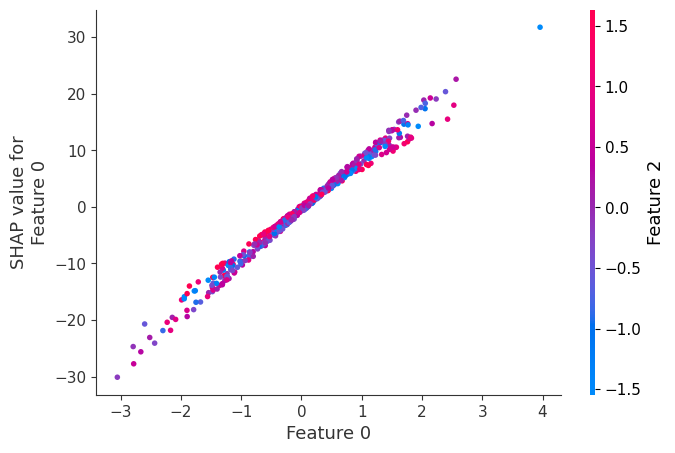

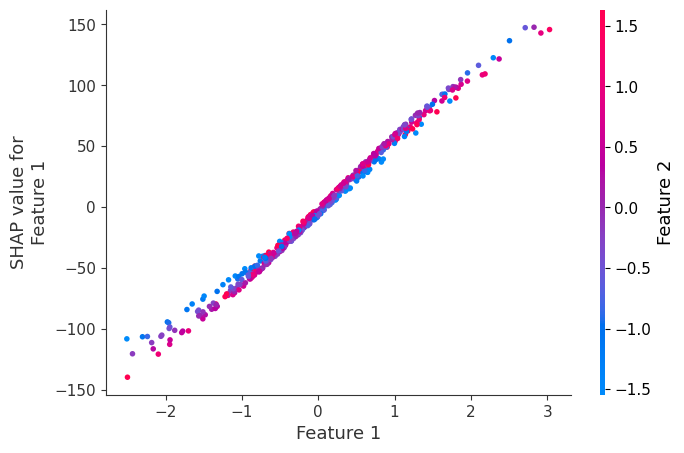

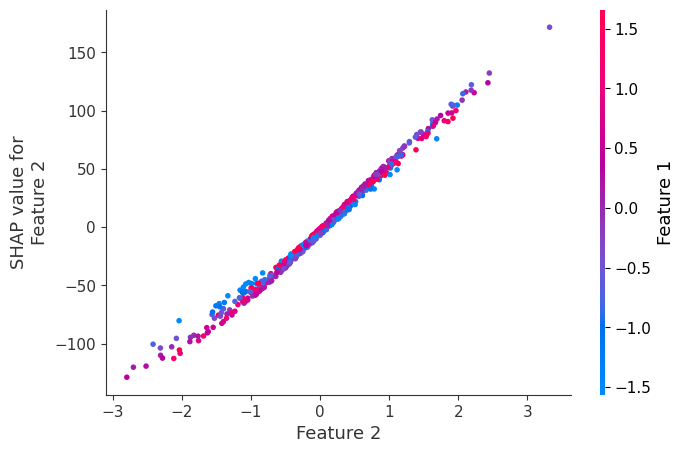

In [42]:
shap.dependence_plot(0, shap_values, x)
shap.dependence_plot(1, shap_values, x)
shap.dependence_plot(2, shap_values, x)